In [122]:
import tdms
import imp
imp.reload(tdms)
import filter
import events
imp.reload(events)
import plot
import functions
import numpy as np
import matplotlib
%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Open file & plot traces

In [107]:
# data = tdms.read_tdms("/Volumes/DATA/data/tdms/D2-vc-060717-vc2-1.tdms")
# data = tdms.read_tdms("/Volumes/DATA/data/tdms/CHSL-6.8.1701-9VCLAMPNACURRENT.tdms")
# data = tdms.read_tdms("/Volumes/DATA/data/tdms/CHSL-6.8.1702-1.tdms")
data = tdms.read_tdms("/Users/cs/Downloads/CHSL-AL-IV-3-4-555576983.tdms")

In [108]:
holding = -80
mini_threshold = -10 # detection threshold (used on bandpass-filtered data)
f_lo = 0.001 # lower bandpass cutoff frequency (in kHz)
f_hi = 0.02 # higher bandpass cutoff frequency (in kHz)
mode = 'epsc' # or 'ipsc' for positive-going events

<IPython.core.display.Javascript object>


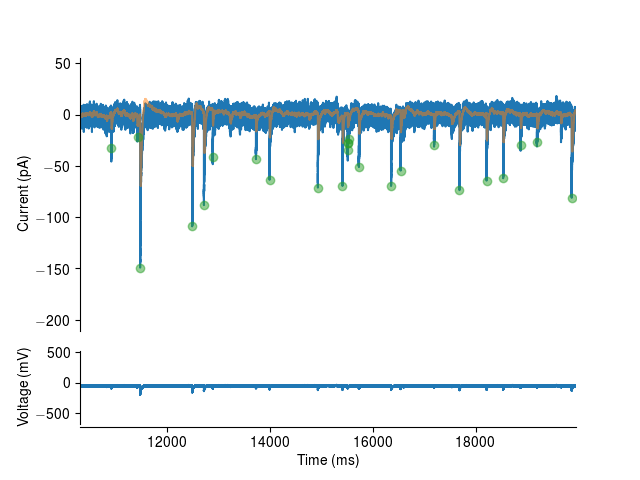

In [123]:
fig, axi, axv = plot.plot_traces(mode='vclamp')

dt = data['dt']
for sweep, command in zip(data['AI0'], data['AO0']):
    sweep_sub = sweep - np.median(sweep)
    times = np.arange(sweep_sub.shape[0])*data['dt']
    filt = filter.bandpass(sweep_sub, dt, f_lo, f_hi)
    ipeaks = events.find_peaks(sweep_sub, dt, mini_threshold, mode='epsc', f_lo=f_lo, f_hi=f_hi)
    axi.plot(times, sweep_sub)
    axv.plot(times, holding + command)
    axi.plot(times, filt, alpha=0.5)
    axi.plot(ipeaks*dt, sweep_sub[ipeaks], 'o', alpha=0.5)

plt.show()